In [18]:
!pip install -q tensorflow --break-system-packages

In [19]:
!pip show tensorflow

Name: tensorflow
Version: 2.20.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/init/.local/lib/python3.12/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google_pasta, grpcio, h5py, keras, libclang, ml_dtypes, numpy, opt_einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing_extensions, wrapt
Required-by: 


In [3]:
!export TF_ENABLE_ONEDNN_OPTS=0

In [4]:
import tensorflow as tf
from tensorflow. keras import layers, Model
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [5]:
input_columns = [
    'CO2_Room', 'CO_Room', 'H2_Room', 'Humidity_Room', 'PM05_Room', 'PM100_Room',
    'PM10_Room', 'PM25_Room', 'PM40_Room', 'PM_Room_Typical_Size', 'PM_Total_Room',
    'Temperature_Room', 'VOC_Room', 'VOC_Room_RAW',
    'CO2_Room_Trend', 'CO_Room_Trend', 'H2_Room_Trend', 'PM05_Room_Trend',
    'PM10_Room_Trend', 'PM25_Room_Trend', 'PM40_Room_Trend', 'PM100_Room_Trend',
    'PM_Room_Typical_Size_Trend', 'VOC_Room_RAW_Trend'
]

# Ignored: Unnamed: 0, Date, Sensor_ID, scenario_label, number_label, UV_Room, Interval_label, class
# Target (y)
target_column = 'class'

In [6]:
df = pd.read_csv('Laboratory Fire Dataset containing Multi Sensor Data.csv')

In [7]:
df.head()

,Unnamed: 0,Date,Sensor_ID,CO2_Room,CO_Room,H2_Room,Humidity_Room,PM05_Room,PM100_Room,PM10_Room,...,CO2_Room_Trend,CO_Room_Trend,H2_Room_Trend,PM05_Room_Trend,PM10_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,PM100_Room_Trend,PM_Room_Typical_Size_Trend,VOC_Room_RAW_Trend
0,0,0,sensornode0005,568.4,-0.15,0.58,42.44,46,0,7,...,-0.576667,0.933333,-0.960000,-0.926667,-0.773333,0.0,0.0,0.0,-0.766667,0.726667
1,1,0,sensornode0006,637.3,-0.12,0.79,42.34,48,0,7,...,-0.876667,0.920000,-0.960000,-0.936667,-0.756667,0.0,0.0,0.0,0.296667,0.696667
2,2,0,sensornode0007,792.2,-0.19,0.39,42.92,52,0,8,...,0.320000,0.906667,-0.826667,-0.966667,-0.826667,0.0,0.0,0.0,0.140000,0.583333
3,3,0,sensornode0008,660.7,0.65,0.53,44.31,50,0,7,...,-0.036667,0.960000,-0.933333,-0.936667,-0.850000,0.0,0.0,0.0,-0.123333,0.896667
4,4,10,sensornode0005,592.5,-0.06,0.38,42.55,48,0,7,...,-0.576667,0.933333,-0.960000,-0.926667,-0.773333,0.0,0.0,0.0,-0.766667,0.726667


In [8]:
df_data = df[input_columns].copy()

In [9]:
df_data

,CO2_Room,CO_Room,H2_Room,Humidity_Room,PM05_Room,PM100_Room,PM10_Room,PM25_Room,PM40_Room,PM_Room_Typical_Size,...,CO2_Room_Trend,CO_Room_Trend,H2_Room_Trend,PM05_Room_Trend,PM10_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,PM100_Room_Trend,PM_Room_Typical_Size_Trend,VOC_Room_RAW_Trend
0,568.4,-0.15,0.58,42.44,46,0,7,0,0,0.49,...,-0.576667,0.933333,-0.960000,-0.926667,-0.773333,0.000000,0.000000,0.000000,-0.766667,0.726667
1,637.3,-0.12,0.79,42.34,48,0,7,0,0,0.49,...,-0.876667,0.920000,-0.960000,-0.936667,-0.756667,0.000000,0.000000,0.000000,0.296667,0.696667
2,792.2,-0.19,0.39,42.92,52,0,8,0,0,0.54,...,0.320000,0.906667,-0.826667,-0.966667,-0.826667,0.000000,0.000000,0.000000,0.140000,0.583333
3,660.7,0.65,0.53,44.31,50,0,7,0,0,0.43,...,-0.036667,0.960000,-0.933333,-0.936667,-0.850000,0.000000,0.000000,0.000000,-0.123333,0.896667
4,592.5,-0.06,0.38,42.55,48,0,7,0,0,0.49,...,-0.576667,0.933333,-0.960000,-0.926667,-0.773333,0.000000,0.000000,0.000000,-0.766667,0.726667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,652.2,-1.91,-0.56,26.13,43,0,6,0,0,0.59,...,-0.583333,-0.386667,-0.520000,-0.703333,-0.536667,-0.390000,-0.013333,0.000000,-0.560000,-0.850000
2896,691.9,-2.02,-0.25,24.31,42,0,7,0,0,0.62,...,-0.393333,-0.426667,-0.373333,-0.530000,-0.313333,-0.126667,0.003333,-0.006667,-0.210000,-0.666667
2897,557.1,-0.47,-1.32,24.45,44,0,7,0,0,0.62,...,-0.740000,-0.680000,-0.693333,-0.706667,-0.666667,-0.560000,-0.133333,-0.033333,-0.776667,-0.803333
2898,658.9,-0.52,-0.18,24.75,44,0,8,0,0,0.72,...,-0.526667,-0.560000,-0.400000,-0.493333,-0.350000,-0.213333,-0.080000,-0.023333,-0.246667,-0.780000


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

input_columns = df_data.columns.tolist()

standard_cols = [
    "CO2_Room", "Humidity_Room",
    "CO2_Room_Trend", "PM10_Room_Trend"
]

minmax_cols = [
    "CO_Room", "H2_Room",
    "PM05_Room", "PM25_Room",
    "PM_Room_Typical_Size"
]

robust_cols = [
    "PM100_Room", "PM10_Room", "PM40_Room",
    "H2_Room_Trend", "PM05_Room_Trend",
    "PM25_Room_Trend", "PM40_Room_Trend"
]

no_scale_cols = [
    "VOC_Room_RAW_Trend"   # stays unchanged
]

# -------------------------------------------
# 3. Build ColumnTransformer
# -------------------------------------------

ct = ColumnTransformer(
    transformers=[
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("robust", RobustScaler(), robust_cols),
        ("identity", "passthrough", no_scale_cols),
    ],
    remainder="drop"  # remove any column not listed above
)

# -------------------------------------------
# 4. Fit & transform using the transformer
# -------------------------------------------

scaled_array = ct.fit_transform(df_data)

# Final column order
final_columns = (
    standard_cols
    + minmax_cols
    + robust_cols
    + no_scale_cols
)

df_scaled = pd.DataFrame(scaled_array, columns=final_columns)

# -------------------------------------------
# 5. Show result
# -------------------------------------------
print(df_scaled.shape)
df_scaled.head()

(2900, 17)


,CO2_Room,Humidity_Room,CO2_Room_Trend,PM10_Room_Trend,CO_Room,H2_Room,PM05_Room,PM25_Room,PM_Room_Typical_Size,PM100_Room,PM10_Room,PM40_Room,H2_Room_Trend,PM05_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,VOC_Room_RAW_Trend
0,-0.481909,0.364765,-1.138983,-1.389160,0.014226,0.057089,0.000623,0.0,0.115702,0.0,-0.00252,0.0,-0.576783,-0.845341,0.0,0.0,0.726667
1,-0.415762,0.347072,-1.599214,-1.355242,0.014424,0.061481,0.000659,0.0,0.115702,0.0,-0.00252,0.0,-0.576783,-0.856868,0.0,0.0,0.696667
2,-0.267050,0.449692,0.236596,-1.497696,0.013963,0.053116,0.000730,0.0,0.157025,0.0,-0.00231,0.0,-0.493493,-0.891451,0.0,0.0,0.583333
3,-0.393296,0.695627,-0.310568,-1.545181,0.019495,0.056043,0.000694,0.0,0.066116,0.0,-0.00252,0.0,-0.560125,-0.856868,0.0,0.0,0.896667
4,-0.458772,0.384228,-1.138983,-1.389160,0.014819,0.052907,0.000659,0.0,0.115702,0.0,-0.00252,0.0,-0.576783,-0.845341,0.0,0.0,0.726667


In [11]:
df_scaled = df_scaled.replace(0, 0.0000001)
df_scaled.head()

,CO2_Room,Humidity_Room,CO2_Room_Trend,PM10_Room_Trend,CO_Room,H2_Room,PM05_Room,PM25_Room,PM_Room_Typical_Size,PM100_Room,PM10_Room,PM40_Room,H2_Room_Trend,PM05_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,VOC_Room_RAW_Trend
0,-0.481909,0.364765,-1.138983,-1.389160,0.014226,0.057089,0.000623,1.000000e-07,0.115702,1.000000e-07,-0.00252,1.000000e-07,-0.576783,-0.845341,1.000000e-07,1.000000e-07,0.726667
1,-0.415762,0.347072,-1.599214,-1.355242,0.014424,0.061481,0.000659,1.000000e-07,0.115702,1.000000e-07,-0.00252,1.000000e-07,-0.576783,-0.856868,1.000000e-07,1.000000e-07,0.696667
2,-0.267050,0.449692,0.236596,-1.497696,0.013963,0.053116,0.000730,1.000000e-07,0.157025,1.000000e-07,-0.00231,1.000000e-07,-0.493493,-0.891451,1.000000e-07,1.000000e-07,0.583333
3,-0.393296,0.695627,-0.310568,-1.545181,0.019495,0.056043,0.000694,1.000000e-07,0.066116,1.000000e-07,-0.00252,1.000000e-07,-0.560125,-0.856868,1.000000e-07,1.000000e-07,0.896667
4,-0.458772,0.384228,-1.138983,-1.389160,0.014819,0.052907,0.000659,1.000000e-07,0.115702,1.000000e-07,-0.00252,1.000000e-07,-0.576783,-0.845341,1.000000e-07,1.000000e-07,0.726667


In [12]:
df_scaled.shape[1]

17

In [13]:
LATENT_DIM = 128              # More capacity for learning structure
DATA_DIM = df_scaled.shape[1] # 24 features
BATCH_SIZE = 512              # Reduce from 800 → more stable gradients
EPOCHS = 2000                 # Tabular GANs need 1500–3000 epochs
LEARNING_RATE = 0.0001        # Lower LR → smoother training
BETA_1 = 0.5                  # Standard


1. LATENT_DIM = 100
What it means:

This is the dimension of the noise vector (z) fed into the generator.

Why it's important:

The generator learns to map this random noise into realistic samples.

Higher dimensions → richer diversity but harder to train.

100 is a standard choice for GANs (used in DCGAN, etc.).

2. DATA_DIM = len(input_columns)
What it means:

This is the dimension of your output data — basically the number of features your generator must produce.

Why it's important:

Since your dataset has 24 input features, the generator must output a 24-dimensional vector and the discriminator must accept the same shape.

3. BATCH_SIZE = 118
What it means:

This is the number of samples fed into the discriminator (and used to train the generator) in one forward/backward pass.

Why it's important:

Larger batch size → more stable gradients but requires more memory.

Smaller batch size → noisier updates but sometimes helps GANs train better.

You picked 118, which might be tied to your dataset size.

4. EPOCHS = 100
What it means:

One epoch = one full pass over the entire training dataset.
You are training the GAN for 100 epochs.

Why it's important:

GANs often need more epochs than supervised models.

100 is a safe starting point — you can increase if results are not good.

5. LEARNING_RATE = 0.0002
What it means:

This controls how fast the generator and discriminator update their weights.

Why it's important:

GANs are very sensitive to LR.

0.0002 (2e-4) is the recommended LR for stable GAN training (DCGAN paper).

Too high → GAN collapses

Too low → slow training

6. BETA_1 = 0.5 (Adam optimizer parameter)
What it means:

This is a momentum term used by the Adam optimizer.

Why it's important:

Controls how much past gradients influence current updates.

For GANs, β₁ = 0.5 is recommended because:

It reduces oscillations

Improves generator–discriminator balance

Helps avoid mode collapse

Default Adam uses β₁ = 0.9, but GANs perform poorly with that.

In [16]:
df_size = len(df_scaled)
dataset = tf.data.Dataset.from_tensor_slices(df_scaled.values.astype('float32')) \
    .shuffle(buffer_size=df_size) \
    .batch(BATCH_SIZE, drop_remainder=True)
df_size

2900

In [17]:
dataset

<_BatchDataset element_spec=TensorSpec(shape=(512, 17), dtype=tf.float32, name=None)>

In [18]:
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [19]:
def build_generator(latent_dim, data_dim):
    model = tf.keras.Sequential([
        
        Dense(512, use_bias=False, input_shape=(latent_dim,)),
        BatchNormalization(),
        LeakyReLU(0.2),

        Dense(1024, use_bias=False),
        BatchNormalization(),
        LeakyReLU(0.2),

        Dense(512, use_bias=False),
        BatchNormalization(),
        LeakyReLU(0.2),

        Dense(256, use_bias=False),
        BatchNormalization(),
        LeakyReLU(0.2),

        Dense(data_dim, activation='tanh')  # Output: 24 features
    ], name="Generator")
    return model


In [20]:
def build_discriminator(data_dim):
    model = tf.keras.Sequential([

        Dense(512, input_shape=(data_dim,)),
        LeakyReLU(0.2),
        Dropout(0.3),

        Dense(256),
        LeakyReLU(0.2),
        Dropout(0.3),

        Dense(128),
        LeakyReLU(0.2),
        Dropout(0.3),

        Dense(64),
        LeakyReLU(0.2),

        Dense(1, activation='sigmoid')  # Real/Fake probability
    ], name="Discriminator")
    return model


In [22]:
generator = build_generator(LATENT_DIM, DATA_DIM)
discriminator = build_discriminator(DATA_DIM)

Adam is an optimization technique used to update the weights of a neural network during training.
It is built on two ideas:

✔ 1. Momentum (First Moment / m)

Adam keeps track of the average of past gradients, which helps speed up learning in the right direction.

✔ 2. Adaptive Learning Rates (Second Moment / v)

Adam also keeps track of the average of squared gradients, which allows each parameter to have its own adaptive learning rate.

This makes training faster, smoother, and more stable.

In [23]:
optimizer_d = Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)
optimizer_g = Adam(learning_rate=LEARNING_RATE, beta_1=BETA_1)
loss_fn = tf.keras.losses.BinaryCrossentropy()

In [24]:
discriminator.compile(optimizer=optimizer_d, loss=loss_fn)

In [25]:
gan_model = tf.keras.Sequential([generator, discriminator], name="GAN")
gan_model.compile(optimizer=optimizer_g, loss=loss_fn)

In [26]:
gan_model

<Sequential name=GAN, built=True>

In [27]:
real_labels = tf.ones((BATCH_SIZE, 1))
fake_labels = tf.zeros((BATCH_SIZE, 1))
# Smooth real labels (e.g., use 0.9 instead of 1.0) often helps stabilize D training
smooth_real_labels = tf.ones((BATCH_SIZE, 1)) * 0.9

In [28]:
import csv
import os

log_file = "training_logs_v3.csv"
write_header = not os.path.exists(log_file)

with open(log_file, mode="a", newline="") as file:
    writer = csv.writer(file)
    if write_header:
        writer.writerow(["epoch", "step", "d_loss", "g_loss"])


In [29]:
for epoch in range(EPOCHS):

    #print(f"\nEpoch {epoch}/{EPOCHS}")
    
    for step, real_data_batch in enumerate(dataset):

        batch_size = tf.shape(real_data_batch)[0]

        # 1. Train Discriminator
        real_labels = tf.ones((batch_size, 1)) * 0.9
        fake_labels = tf.zeros((batch_size, 1))

        noise = tf.random.normal([batch_size, LATENT_DIM])  # generate fake data
        fake_data = generator(noise, training=False)

        discriminator.trainable = True

        d_loss_real = discriminator.train_on_batch(real_data_batch, real_labels) # train on real data
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels) # train on fake data

        d_loss = d_loss_real + d_loss_fake

        # 2. Train Generator
        discriminator.trainable = False
        
        noise = tf.random.normal([batch_size, LATENT_DIM])
        g_loss = gan_model.train_on_batch(noise, real_labels)

        # Console Log
        # print(f"Step {step} | D Loss: {d_loss:.4f} | G Loss: {g_loss:.4f}")

        # SAVE TO CSV
        with open(log_file, mode="a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow([int(epoch), int(step), float(d_loss), float(g_loss)])

print(d_loss, g_loss)

2025-12-09 00:34:36.343669: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-12-09 00:34:36.530975: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-12-09 00:34:36.912836: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-12-09 00:34:37.656308: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-12-09 00:34:39.137149: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-12-09 00:34:42.107993: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-12-09 00:34:48.354254: I tensorflow/core/framework/local_rendezvous.cc:407] L

0.6814573 2.246919


In [30]:
generator

<Sequential name=Generator, built=True>

In [31]:
generator.save("generator.keras")
discriminator.save("discriminator.keras")
gan_model.save("gan_model.keras")

In [42]:
print("\nGAN Training finished. Generating 100 new synthetic data points...")
noise_test = tf.random.normal([100, LATENT_DIM])
synthetic_scaled_data = generator(noise_test).numpy()


GAN Training finished. Generating 100 new synthetic data points...


In [43]:
synthetic_scaled_data

array([[-4.2688227e-01,  2.2081764e-01, -1.5479599e-01, ...,
         6.9615233e-04,  8.9636222e-03,  9.3981132e-02],
       [-4.5184126e-01,  1.2629420e-01, -7.6822191e-01, ...,
         4.0068537e-02, -1.7758785e-02,  4.3586034e-01],
       [-5.3476810e-01,  2.6041588e-01,  1.5310456e-01, ...,
         4.1315056e-02,  1.0738995e-02,  3.1952992e-01],
       ...,
       [-2.4873136e-01,  4.0321341e-01, -1.9218978e-01, ...,
        -6.6843904e-03, -7.2416114e-03,  5.9977949e-01],
       [-3.1954539e-01,  7.1353614e-01,  9.8759675e-01, ...,
         1.8364944e-01,  9.7123377e-02,  7.1469671e-01],
       [-3.4743991e-01,  6.5642285e-01, -2.9307041e-01, ...,
        -4.2817425e-02,  4.4048199e-04, -8.6042064e-01]], dtype=float32)

In [50]:
df_synthetic = pd.DataFrame(synthetic_scaled_data, columns=standard_cols+minmax_cols+robust_cols+no_scale_cols)
print("\nSynthetic Data Sample (in original unscaled range):")
df_synthetic


Synthetic Data Sample (in original unscaled range):


,CO2_Room,Humidity_Room,CO2_Room_Trend,PM10_Room_Trend,CO_Room,H2_Room,PM05_Room,PM25_Room,PM_Room_Typical_Size,PM100_Room,PM10_Room,PM40_Room,H2_Room_Trend,PM05_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,VOC_Room_RAW_Trend
0,-0.426882,0.220818,-0.154796,0.288735,0.869944,0.036248,0.000539,0.002989,0.118384,-0.011743,-0.009635,-0.013247,-0.478784,-0.023837,0.000696,0.008964,0.093981
1,-0.451841,0.126294,-0.768222,-0.782240,0.116530,0.949429,-0.015899,0.019759,0.053932,0.039279,0.023104,0.011340,0.493836,-0.728835,0.040069,-0.017759,0.435860
2,-0.534768,0.260416,0.153105,-0.427588,0.646414,0.036175,-0.005065,-0.000710,0.065662,-0.007507,-0.014510,-0.021208,-0.304212,-0.322546,0.041315,0.010739,0.319530
3,-0.361088,0.443548,-0.326929,0.759710,0.027865,0.034357,-0.000052,-0.003733,0.077309,-0.000279,0.002811,0.000998,-0.652383,0.752784,-0.055914,0.029063,-0.981510
4,-0.422028,0.939684,-0.846728,-0.607769,0.030860,0.065093,0.002009,-0.001821,0.142570,0.006928,0.000251,-0.029281,-0.388395,-0.364195,-0.006639,0.021368,-0.967138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.250334,0.426768,-0.113429,-0.686864,0.056149,0.629141,-0.006671,0.006841,0.139639,-0.010049,0.000273,-0.010271,0.341576,-0.497384,0.009107,-0.003431,0.585369
96,-0.213142,0.428717,-0.172906,-0.657950,0.063320,0.654518,-0.006536,0.006863,0.144533,0.001230,-0.000645,-0.010996,0.372007,-0.490241,-0.003681,-0.010016,0.577318
97,-0.248731,0.403213,-0.192190,-0.683983,0.088102,0.736892,-0.002850,0.012202,0.139134,-0.003064,-0.008545,0.002576,0.394147,-0.531065,-0.006684,-0.007242,0.599779
98,-0.319545,0.713536,0.987597,0.898130,0.065393,-0.045262,-0.045936,-0.009165,0.037534,-0.017758,-0.032053,-0.035577,0.528003,0.533515,0.183649,0.097123,0.714697


In [53]:
real_df = df_scaled[:100]

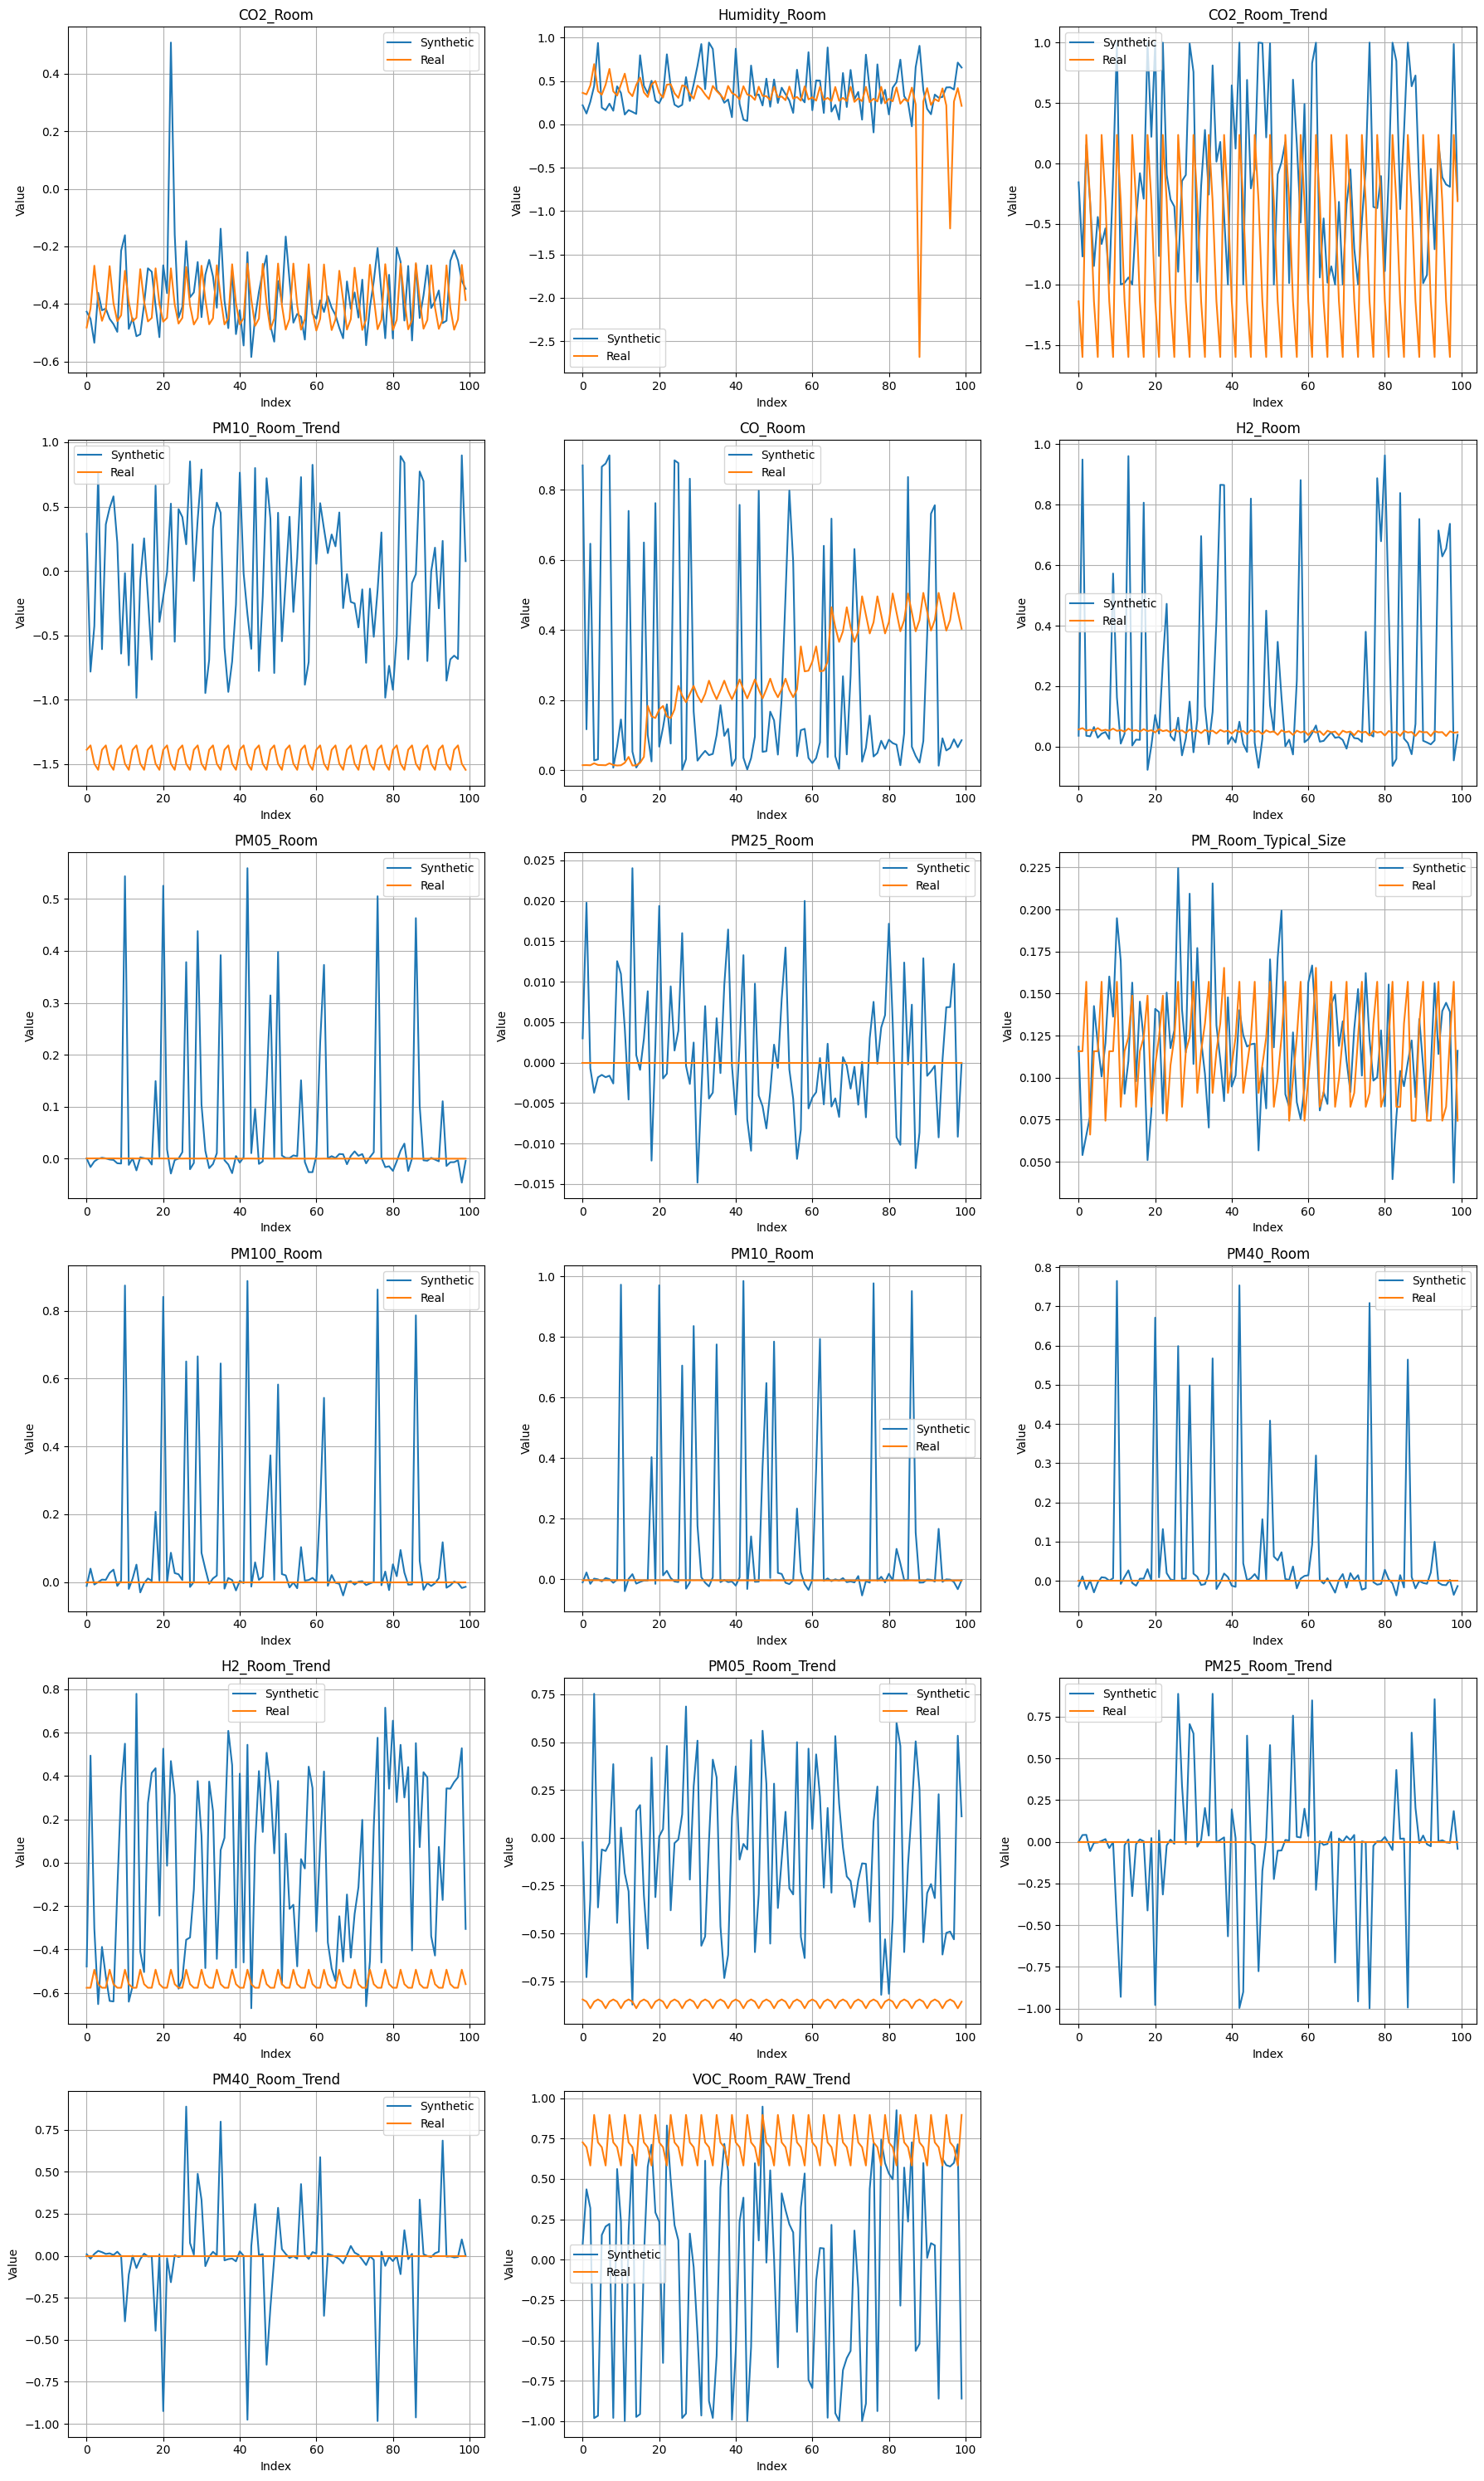

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

real_df = real_df           # your real data
synthetic_df = df_synthetic
 # your synthetic data

num_cols = len(real_df.columns)
cols = 3  # 3 plots per row
rows = (num_cols // cols) + 1

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(real_df.columns):
    plt.subplot(rows, cols, i + 1)

    # Plot SYNTHETIC data (automatic default style #2)
    plt.plot(synthetic_df[col].values, label="Synthetic")

    # Plot REAL data (automatic default style)
    plt.plot(real_df[col].values, label="Real")

    plt.title(col)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


| Metric                | Measures                | Good Value    |
| --------------------- | ----------------------- | ------------- |
| **IS**                | Quality + Diversity     | High          |
| **FID**               | Similarity to real      | Low           |
| **Precision/Recall**  | Quality + Coverage      | Balanced      |
| **Classifer test**    | Realism                 | High accuracy |
| **Statistical tests** | Real distribution match | Low distance  |


In [56]:
from scipy.stats import ks_2samp

for col in real_df.columns:
    stat, p = ks_2samp(real_df[col], df_synthetic[col])
    print(col, "KS p-value:", p)


CO2_Room KS p-value: 0.024055802841094577
Humidity_Room KS p-value: 0.0002248739317492479
CO2_Room_Trend KS p-value: 1.0024645454361508e-11
PM10_Room_Trend KS p-value: 2.2087606931995054e-59
CO_Room KS p-value: 3.319419024623016e-12
H2_Room KS p-value: 8.448372017533173e-11
PM05_Room KS p-value: 3.35710076793659e-13
PM25_Room KS p-value: 8.771130313572204e-15
PM_Room_Typical_Size KS p-value: 0.7020569828664881
PM100_Room KS p-value: 1.1250455638865439e-17
PM10_Room KS p-value: 3.35710076793659e-13
PM40_Room KS p-value: 3.108079571219943e-20
H2_Room_Trend KS p-value: 1.9509242595079607e-39
PM05_Room_Trend KS p-value: 4.417521386399011e-57
PM25_Room_Trend KS p-value: 1.0245697148897385e-13
PM40_Room_Trend KS p-value: 1.0024645454361508e-11
VOC_Room_RAW_Trend KS p-value: 4.043861869934819e-35


Text(0.5, 1.0, 'Synthetic Correlation Matrix')

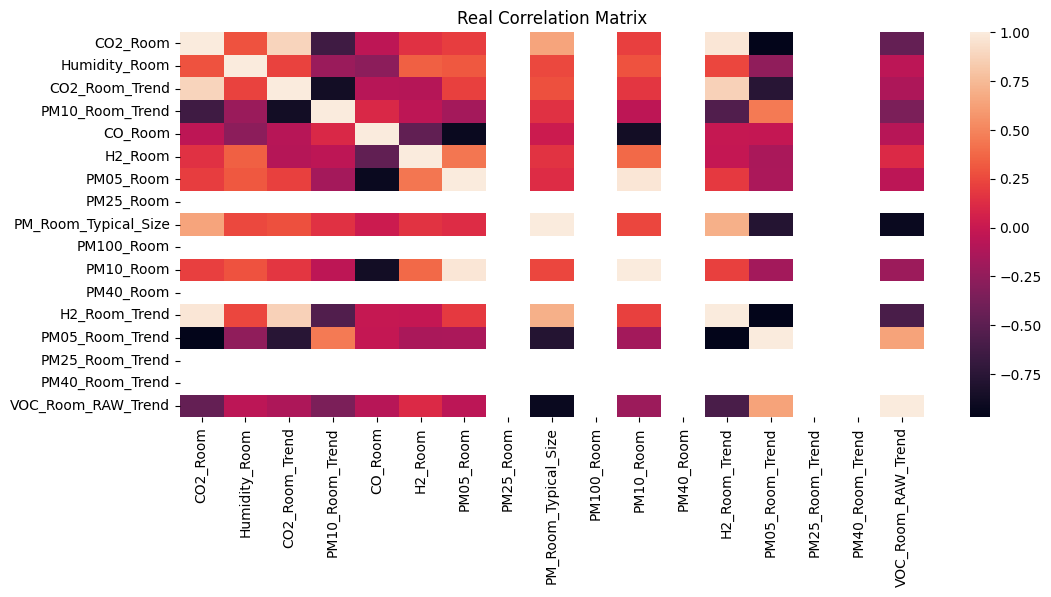

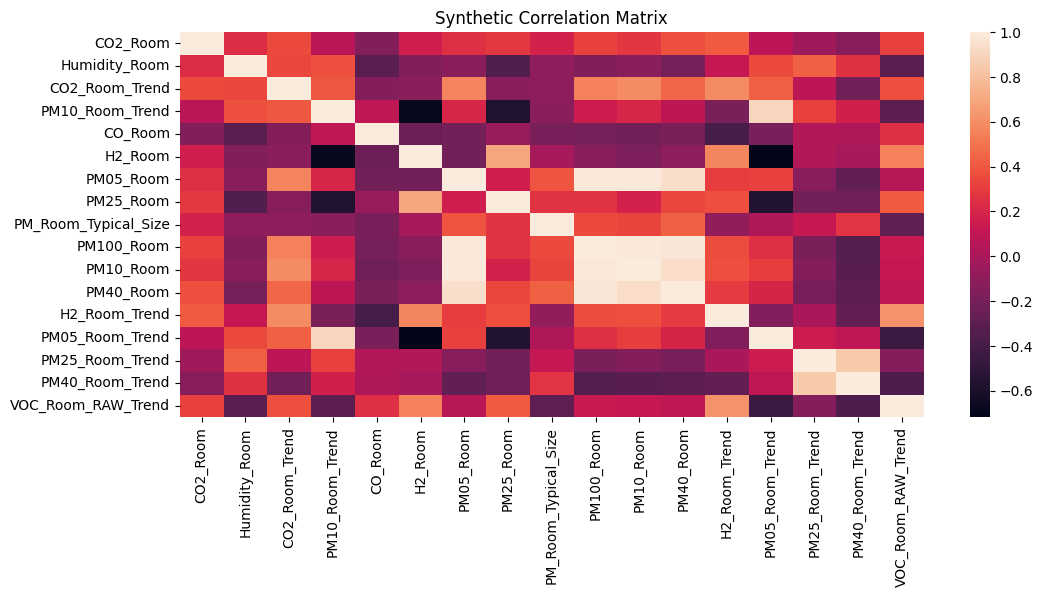

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.heatmap(real_df.corr(), annot=False)
plt.title("Real Correlation Matrix")

plt.figure(figsize=(12,5))
sns.heatmap(df_synthetic.corr(), annot=False)
plt.title("Synthetic Correlation Matrix")


In [58]:
from imblearn.over_sampling import SMOTE

In [67]:
smote = SMOTE(random_state=42)

target_column = 'class'
y = df[target_column]

syn_data_smote, y = smote.fit_resample(df_scaled, y)

In [68]:
syn_data_smote[6400:6500]

,CO2_Room,CO_Room,H2_Room,Humidity_Room,PM05_Room,PM100_Room,PM10_Room,PM25_Room,PM40_Room,PM_Room_Typical_Size,...,CO2_Room_Trend,CO_Room_Trend,H2_Room_Trend,PM05_Room_Trend,PM10_Room_Trend,PM25_Room_Trend,PM40_Room_Trend,PM100_Room_Trend,PM_Room_Typical_Size_Trend,VOC_Room_RAW_Trend
6400,3.823023,2.588407,1.368236,1.172669,-0.620952,-0.387102,-0.488309,-0.427968,-0.422426,-0.872940,...,1.279786,1.051372,0.135578,0.641576,0.401690,-0.118454,-0.190139,-0.213317,-0.689287,1.015188
6401,-0.258856,0.054895,4.542857,0.412097,-0.631201,-0.387102,-0.490217,-0.427968,-0.422426,-0.472094,...,-0.111134,1.139449,0.551960,-0.891994,-0.656540,-0.118454,-0.190139,-0.213317,0.721086,0.712920
6402,-0.280921,0.214912,0.379874,0.151561,1.836711,-0.306551,0.018264,-0.359846,-0.367758,-0.078866,...,1.167285,0.522910,0.933644,0.002016,-0.073157,-0.411413,-0.491709,-0.491107,-0.162335,-0.071224
6403,-0.295072,0.153691,0.315227,0.179798,1.858580,-0.313136,0.016714,-0.366236,-0.374115,0.002077,...,1.167285,0.522910,0.933644,0.002016,-0.073157,-0.411413,-0.491709,-0.491107,-0.162335,-0.071224
6404,-0.170544,-0.206426,-0.008909,0.127742,1.260137,-0.145933,0.575114,0.406060,0.296335,0.799387,...,-1.113415,-1.062477,-0.523693,-1.338998,-1.341675,-2.065214,-2.155539,-2.211272,-1.719945,-0.991170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,-0.209222,-0.201898,-0.024310,0.233788,1.672214,-0.057138,0.932086,0.725497,0.572190,1.480517,...,-1.113415,-1.062477,-0.523693,-1.338998,-1.341675,-2.065214,-2.155539,-2.211272,-1.719945,-0.991170
6496,-0.351560,-0.408788,-0.394998,0.111289,2.138807,2.205296,2.070487,1.922965,1.996228,1.839161,...,1.095693,0.170602,0.864247,-0.850732,0.008245,-0.288560,-0.377320,-0.384265,-0.371566,0.537692
6497,-0.134074,-0.406055,-0.351854,0.225000,2.077805,3.673107,3.222750,3.252512,3.375632,2.483015,...,1.003647,0.368775,1.089787,-0.190540,0.835835,0.788773,0.808159,0.833740,0.434362,0.975762
6498,3.883587,2.188033,1.851928,1.041864,-0.618266,-0.387102,-0.487751,-0.427968,-0.422426,-0.887633,...,-1.328189,-1.502862,-1.321759,-1.352752,-1.518047,-0.118454,-0.190139,-0.213317,1.310033,-1.148875


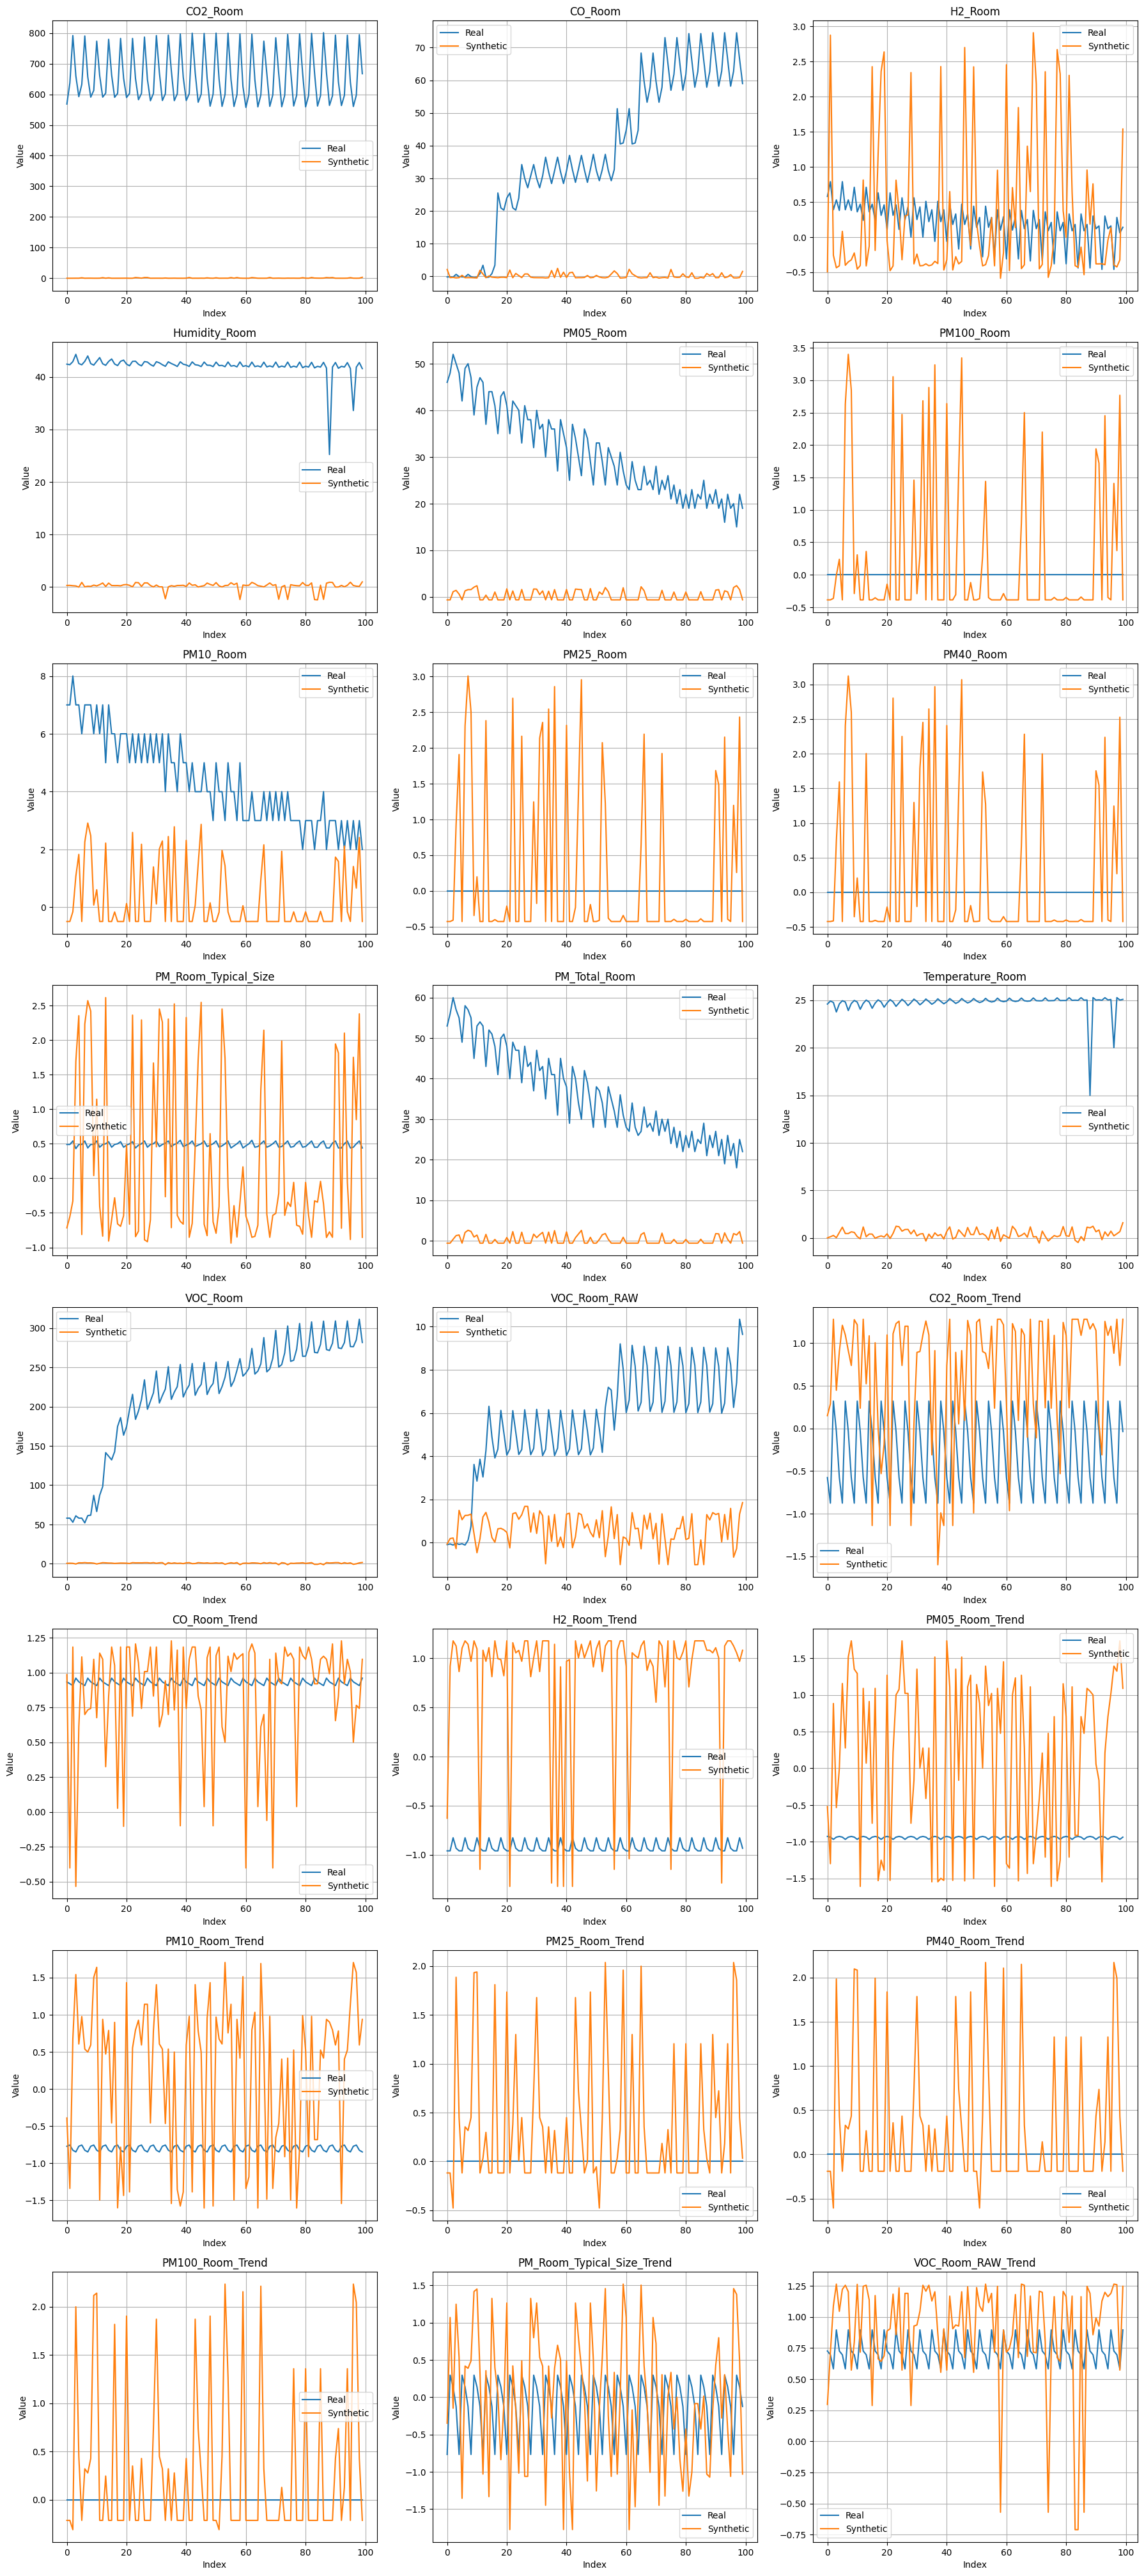

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

real_df = df_data[:100]
synthetic_df = syn_data_smote[4000:4100]

num_cols = len(real_df.columns)
cols = 3  # 3 plots per row
rows = (num_cols // cols) + 1

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(real_df.columns):
    plt.subplot(rows, cols, i + 1)

    # Plot REAL data (automatic default style)
    plt.plot(real_df[col].values, label="Real")

    # Plot SYNTHETIC data (automatic default style #2)
    plt.plot(synthetic_df[col].values, label="Synthetic")

    plt.title(col)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()
